In [2]:
from google.colab import drive
drive.mount('/content/drive')       #import files from the drive directly

Mounted at /content/drive


--- Step 1: Loading Audio ---
Loaded 'corrupted_music.wav'. Sample Rate: 48000 Hz.
Band-Stop filter designed for the range 1700.0-17200.0 Hz.
Band-Stop filter designed for the range 4000.0-16000.0 Hz.

--- Step 2: Designing a cascade of three filters ---
High-Pass filter designed for frequencies below 250.0 Hz.
Band-Stop filter designed for the range 1100.0-1400.0 Hz.
Band-Stop filter designed for the range 1420.0-1600.0 Hz.
Band-Stop filter designed for the range 1650.0-1850.0 Hz.

--- Step 3: Applying the 3 filters in sequence ---
Applying Band-Stop filter for low-frequency beats...
Applying first Band-Stop to remove flute fundamental...
Applying HPF to remove beats...
Applying first Band-Stop to remove flute fundamental...
Applying second Band-Stop to remove flute harmonic...
Applying third Band-Stop to remove extra noise...
All filters applied.

--- Step 4: Saving and visualizing the final result ---
SUCCESS: Final comprehensive restored audio saved to 'restored_music.wav'.


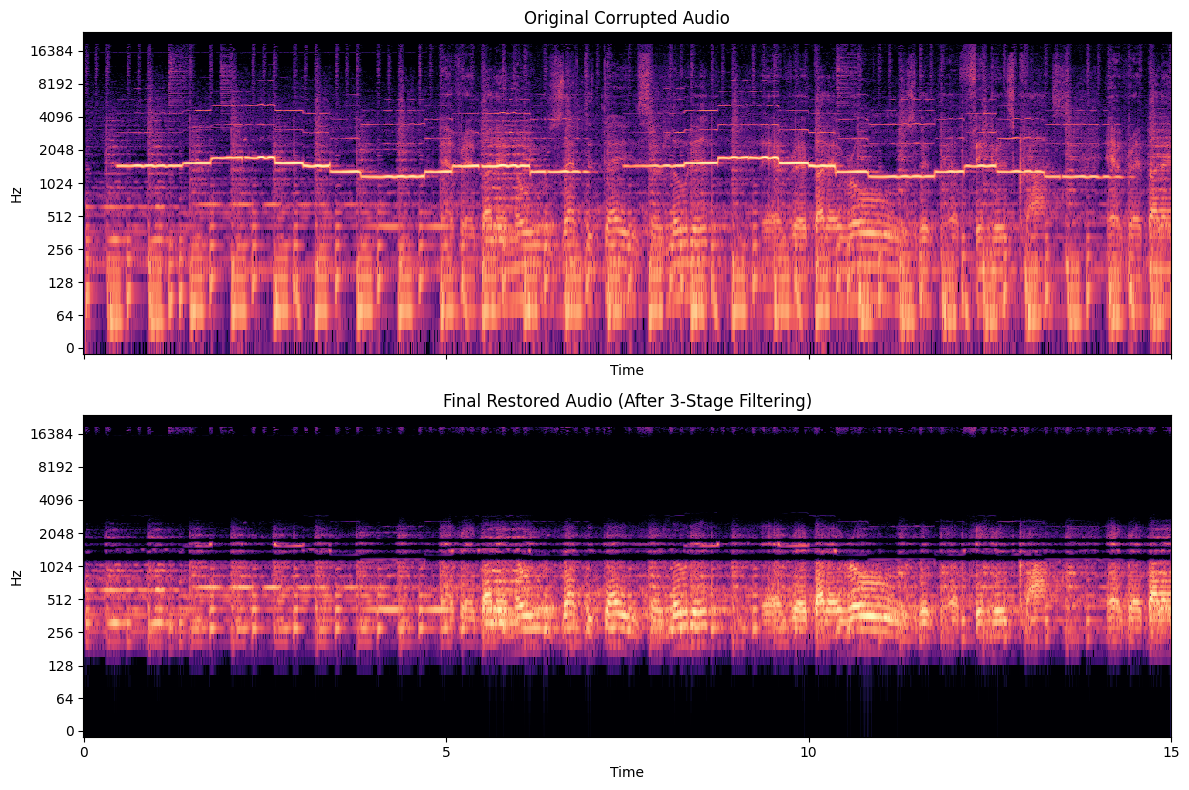

In [3]:
# ===================================================================
#           Q2 - THE ULTIMATE SOLUTION: 3-STAGE FILTER CASCADE
# ===================================================================

import librosa       #importing librosa for feature extraction, singal processing, and visualization
import librosa.display
import numpy as np      #to implement basic array handling operations
import matplotlib.pyplot as plt     #to plot bode plots and
import soundfile as sf
from scipy import signal

# --- 1. Load Audio ---
print("--- Step 1: Loading Audio ---")
try:
    y, sr = librosa.load('/content/drive/My Drive/EE200/Question2/song_with_2piccolo.wav', sr=None, mono=True, dtype=np.float64)
    print(f"Loaded 'corrupted_music.wav'. Sample Rate: {sr} Hz.")

    bs1a_low = 1700.0          # start blocking from 1700 Hz
    bs1a_high = 17200.0        # stop blocking at 17200 Hz
    bs1a_order = 4             # filter sharpness: higher = steeper cutoff
    b_bs1a, a_bs1a = signal.butter(  # design band-stop filter using Butterworth method
    bs1a_order, [bs1a_low, bs1a_high], btype='bandstop', fs=sr)
    print(f"Band-Stop filter designed for the range {bs1a_low}-{bs1a_high} Hz.")  # display the filtered range

    # -- FILTER C: Band-Stop filter for the FLUTE harmonic --
    bs2a_low = 4000.0
    bs2a_high = 16000.0
    bs2a_order = 4
    b_bs2a, a_bs2a = signal.butter(bs2a_order, [bs2a_low, bs2a_high], btype='bandstop', fs=sr)
    print(f"Band-Stop filter designed for the range {bs2a_low}-{bs2a_high} Hz.")

    # lower frequency filters, major contributors
    # --- 2. Design the 3-Stage Filter System ---
    print("\n--- Step 2: Designing a cascade of three filters ---")

    # -- FILTER A: High-Pass filter for the low-frequency BEATS --
    hpf_cutoff = 250.0  # Target the percussive rumble
    hpf_order = 5
    b_hp, a_hp = signal.butter(hpf_order, hpf_cutoff, btype='highpass', fs=sr)
    print(f"High-Pass filter designed for frequencies below {hpf_cutoff} Hz.")

    # -- FILTER B: Band-Stop filter for the fundamental FLUTE sound --
    # Using a wider band to catch any vibrato or imprecision
    bs1_low = 1100.0
    bs1_high = 1400.0
    bs1_order = 4
    b_bs1, a_bs1 = signal.butter(bs1_order, [bs1_low, bs1_high], btype='bandstop', fs=sr)
    print(f"Band-Stop filter designed for the range {bs1_low}-{bs1_high} Hz.")

    # filter D extra
    bs3_low = 1420.0
    bs3_high = 1600.0
    bs3_order = 4
    b_bs3, a_bs3 = signal.butter(bs3_order, [bs3_low, bs3_high], btype='bandstop', fs=sr)
    print(f"Band-Stop filter designed for the range {bs3_low}-{bs3_high} Hz.")

    # -- FILTER C: Band-Stop filter for the FLUTE harmonic --
    bs2_low = 1650.0
    bs2_high = 1850.0
    bs2_order = 4
    b_bs2, a_bs2 = signal.butter(bs2_order, [bs2_low, bs2_high], btype='bandstop', fs=sr)
    print(f"Band-Stop filter designed for the range {bs2_low}-{bs2_high} Hz.")

    # --- 3. Apply the Filters in a Cascade ---
    print("\n--- Step 3: Applying the 3 filters in sequence ---")

    # Start with the original audio
    y_temp = y

    #Apply Filter B1A
    print("Applying Band-Stop filter for low-frequency beats...")
    y_temp = signal.filtfilt(b_bs1a, a_bs1a, y_temp)

    # Apply Filter B2a (Band-Stop 1)
    print("Applying first Band-Stop to remove flute fundamental...")
    y_temp = signal.filtfilt(b_bs2a, a_bs2a, y_temp)

    # Apply Filter A (High-Pass)
    print("Applying HPF to remove beats...")
    y_temp = signal.filtfilt(b_hp, a_hp, y_temp)

    # Apply Filter B (Band-Stop 1)
    print("Applying first Band-Stop to remove flute fundamental...")
    y_temp = signal.filtfilt(b_bs1, a_bs1, y_temp)

    # Apply Filter C (Band-Stop 2)
    print("Applying second Band-Stop to remove flute harmonic...")
    y_restored = signal.filtfilt(b_bs2, a_bs2, y_temp)

    # Apply Filter D (Band-Stop 3)
    print("Applying third Band-Stop to remove extra noise...")
    y_restored = signal.filtfilt(b_bs3, a_bs3, y_restored)

    print("All filters applied.")

    # --- 4. Save and Verify ---
    print("\n--- Step 4: Saving and visualizing the final result ---")

    # Normalize for saving
    max_val = np.max(np.abs(y_restored))
    if max_val > 0:
        y_restored_normalized = y_restored / max_val
    else:
        y_restored_normalized = y_restored

    output_path = 'restored_music.wav'       #this is saved and downloaded
    sf.write(output_path, y_restored_normalized, sr)
    print(f"SUCCESS: Final comprehensive restored audio saved to '{output_path}'.")

    # --- Visualization ---
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True, sharey=True)

    # Plot 1: Original Signal
    S_db_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(S_db_orig, sr=sr, x_axis='time', y_axis='log', ax=axs[0])
    axs[0].set_title('Original Corrupted Audio')

    # Plot 2: Final Restored Signal
    S_db_restored = librosa.amplitude_to_db(np.abs(librosa.stft(y_restored)), ref=np.max)
    librosa.display.specshow(S_db_restored, sr=sr, x_axis='time', y_axis='log', ax=axs[1])
    axs[1].set_title('Final Restored Audio (After 3-Stage Filtering)')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\n\nAN UNEXPECTED ERROR OCCURRED: {e}")

In [4]:
from IPython.display import Audio

print("Original Audio:")
display(Audio(y, rate=sr))

print("\nRestored Audio:")
display(Audio(y_restored_normalized, rate=sr))

Original Audio:



Restored Audio:


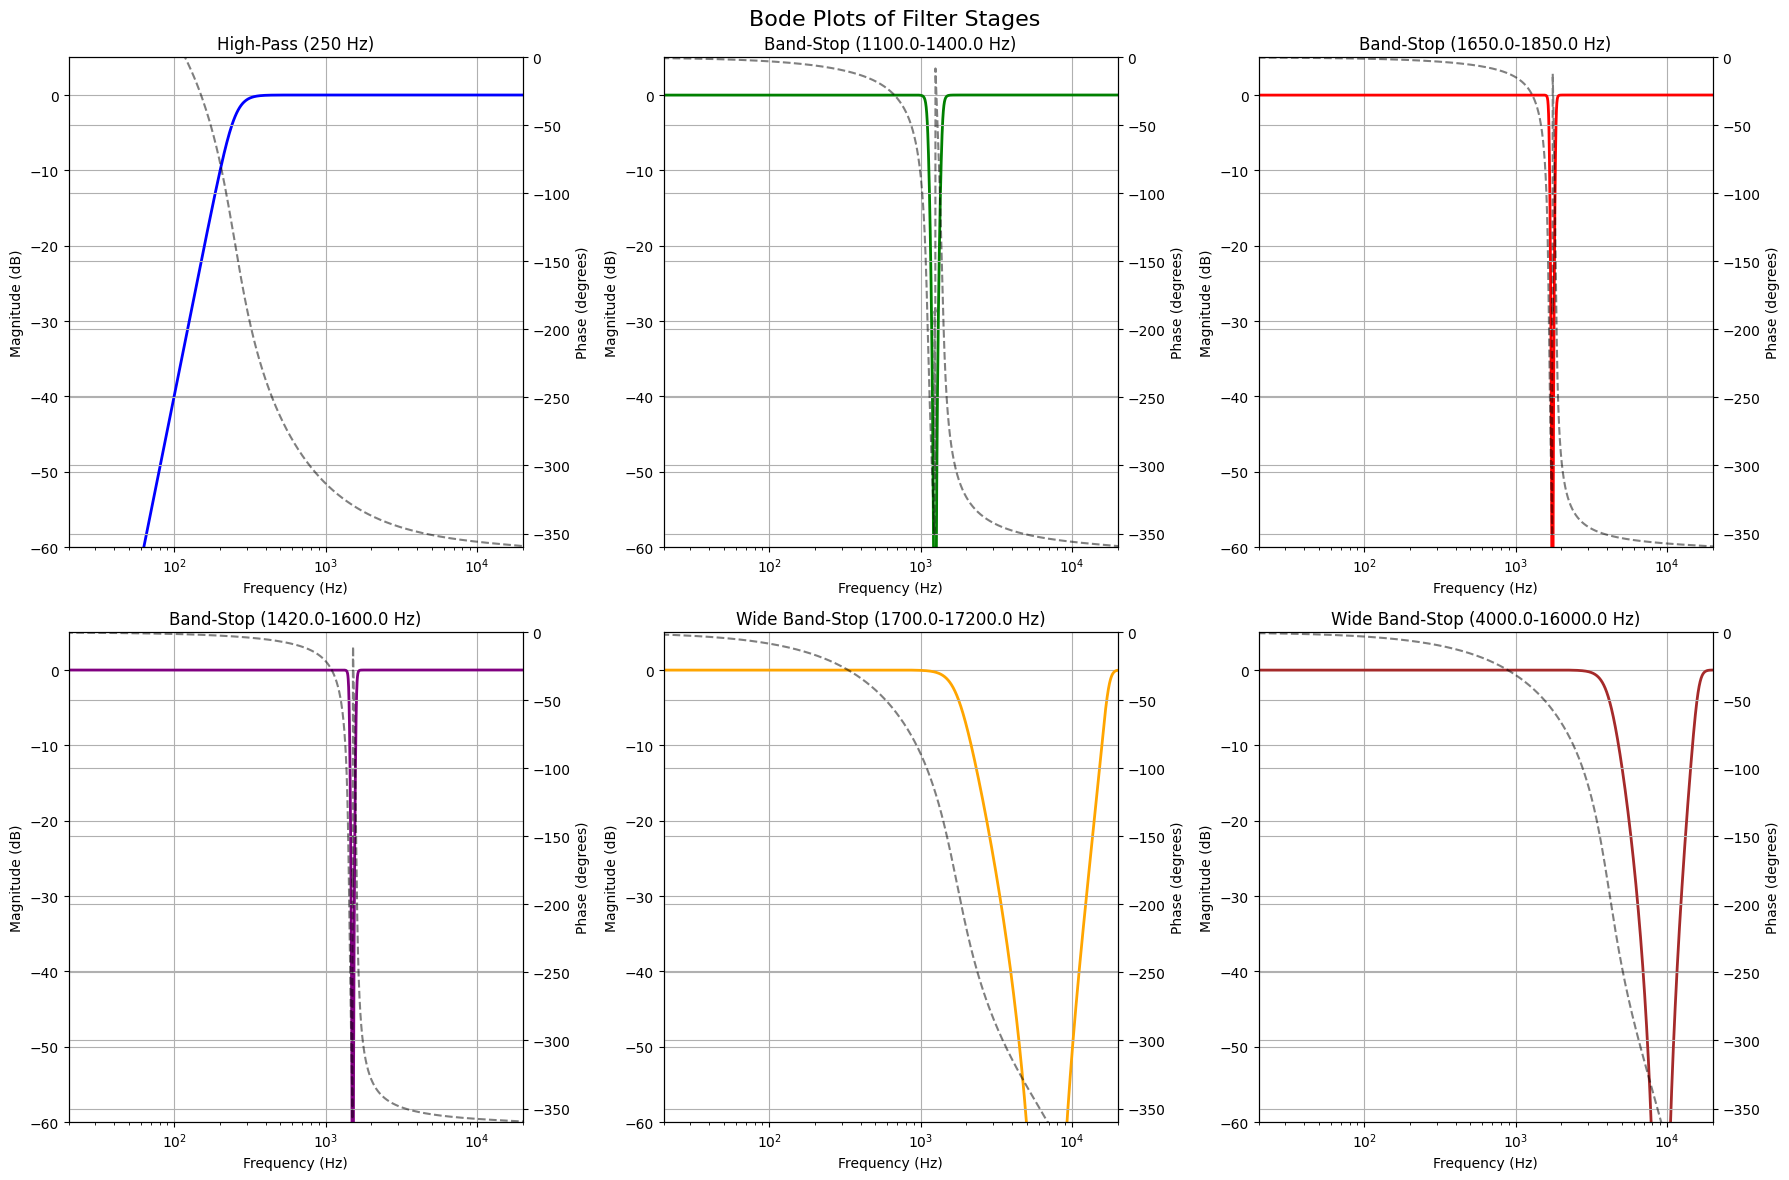

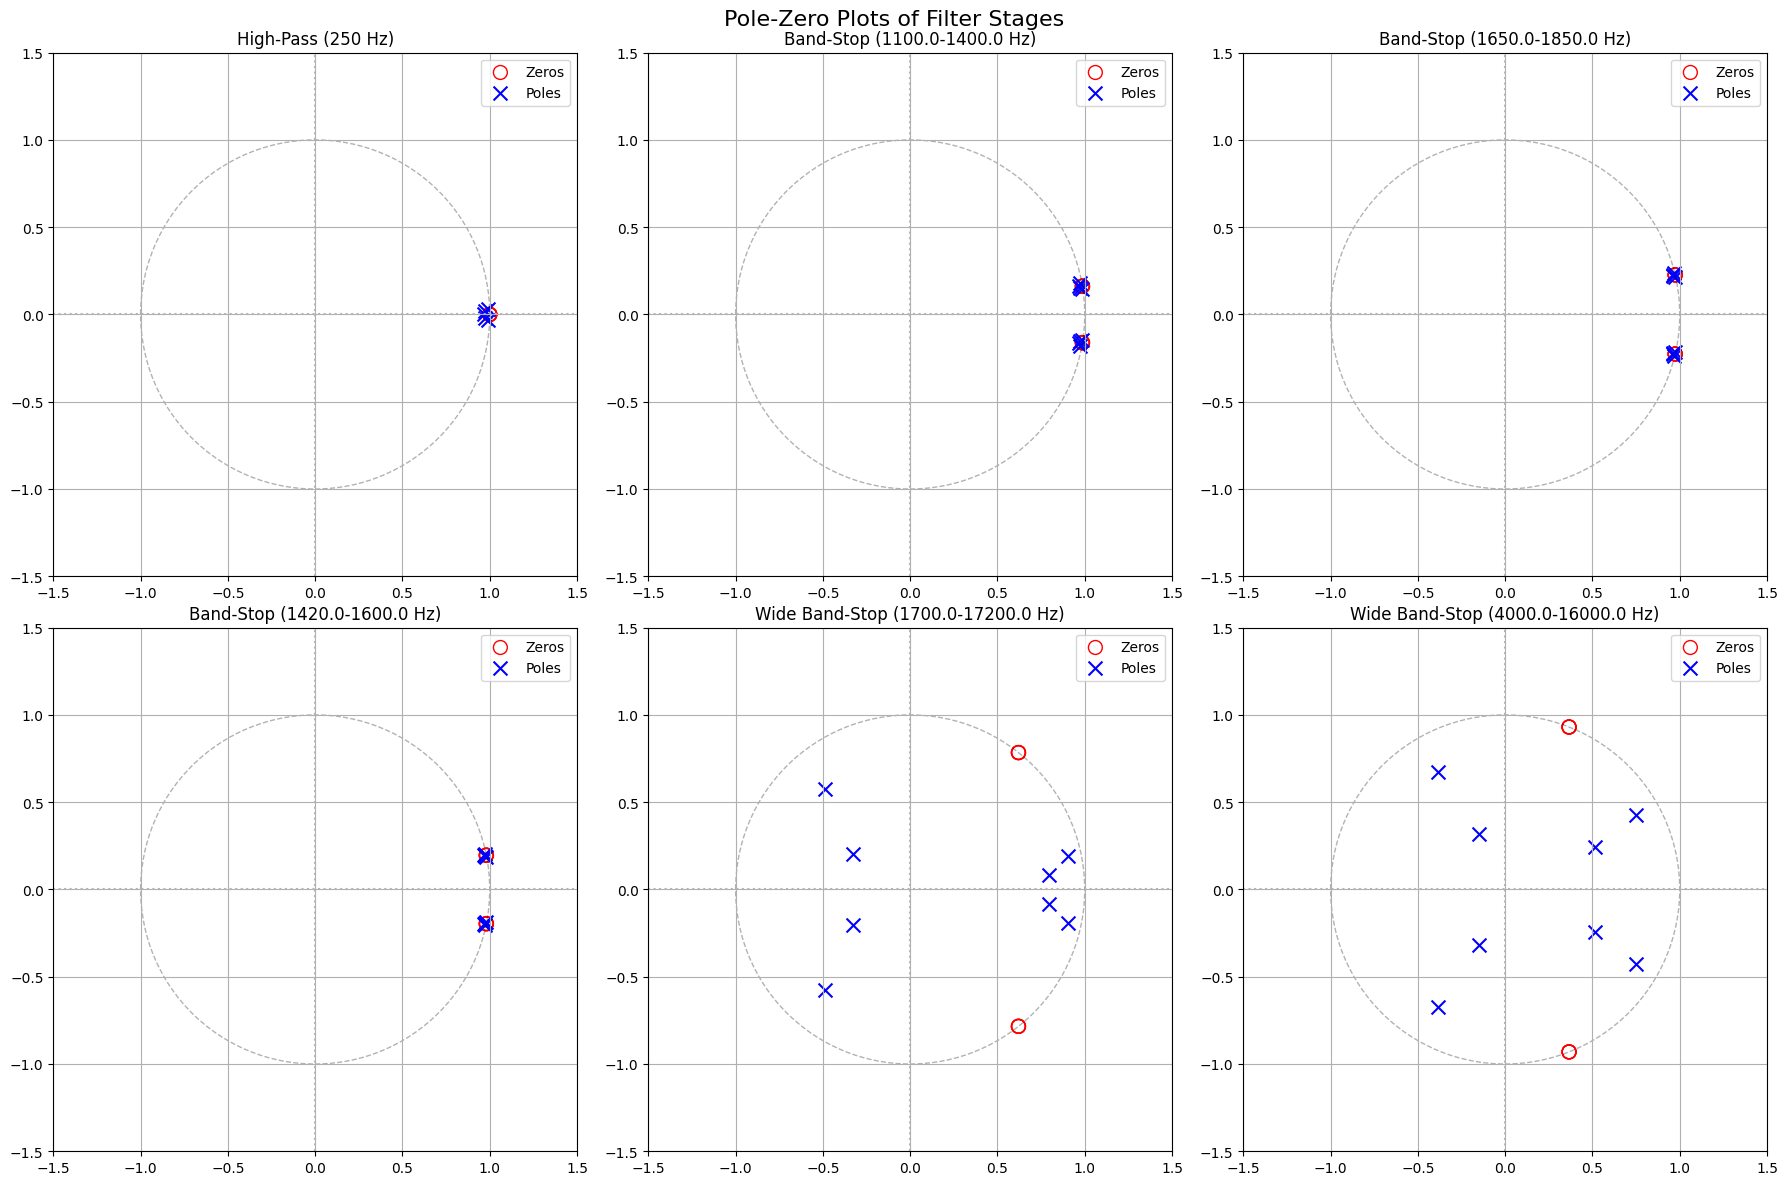

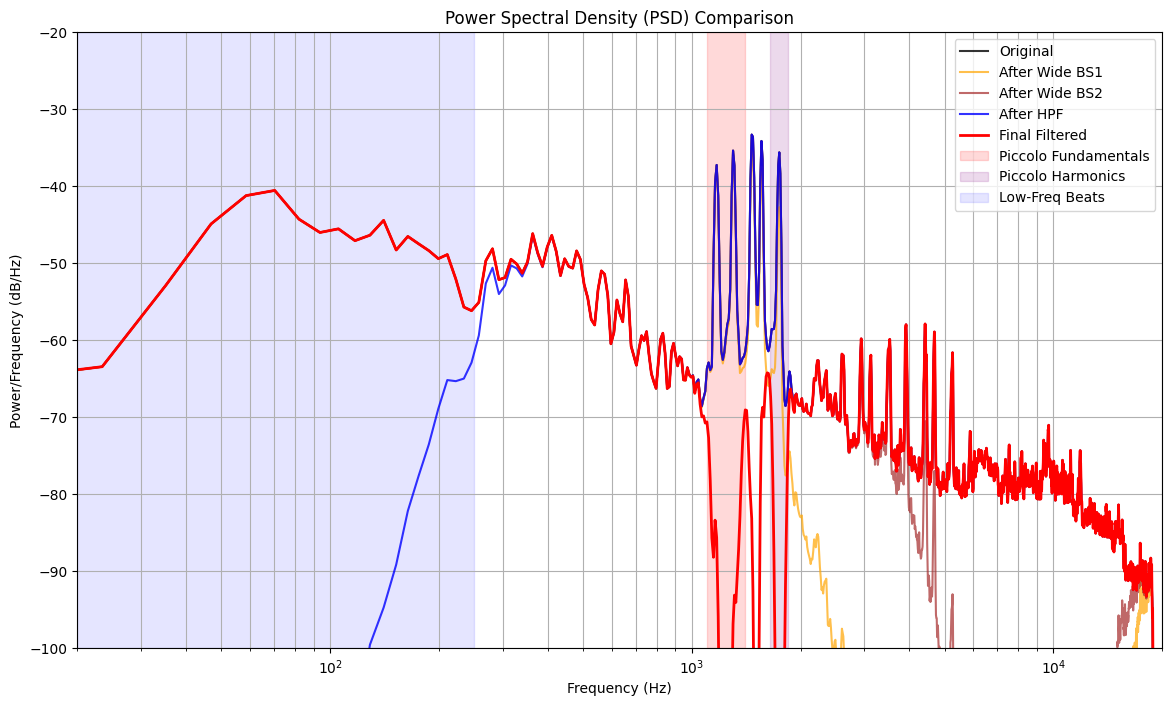

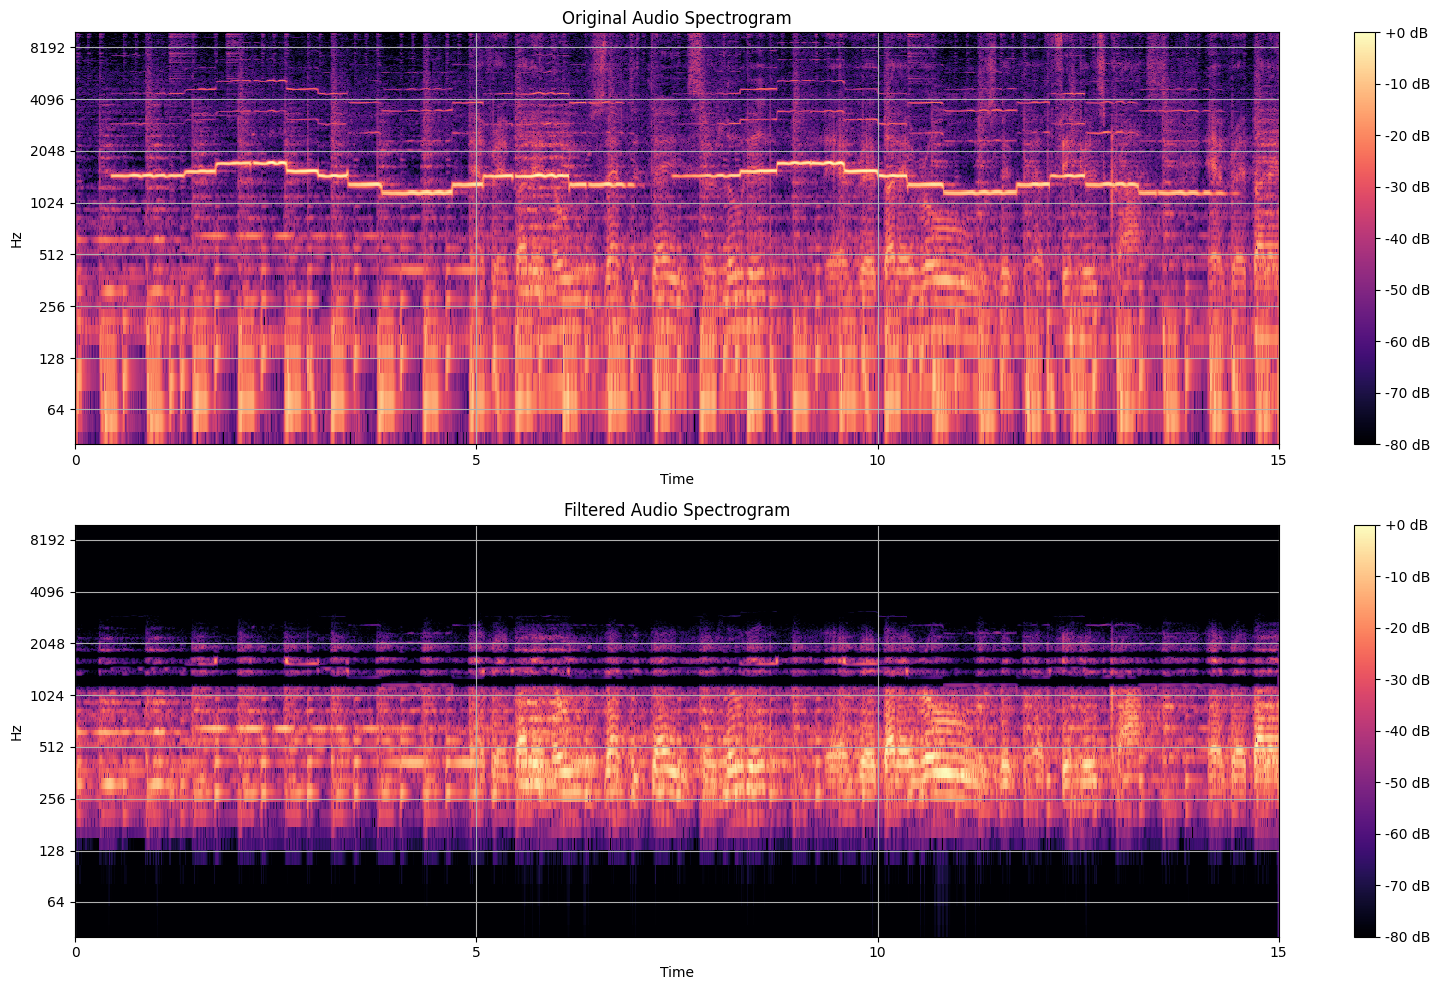


--- SIGNAL ANALYSIS ---


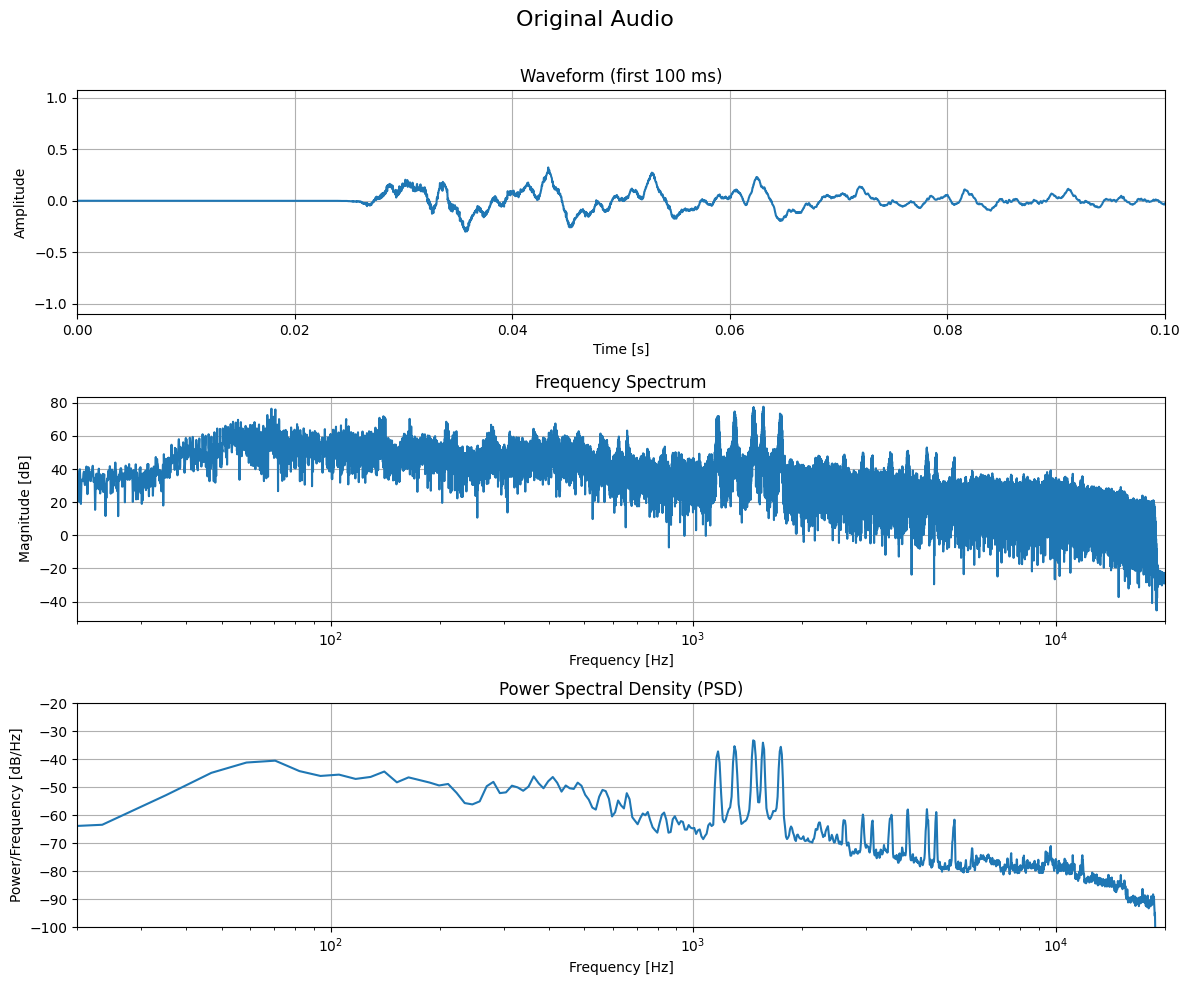

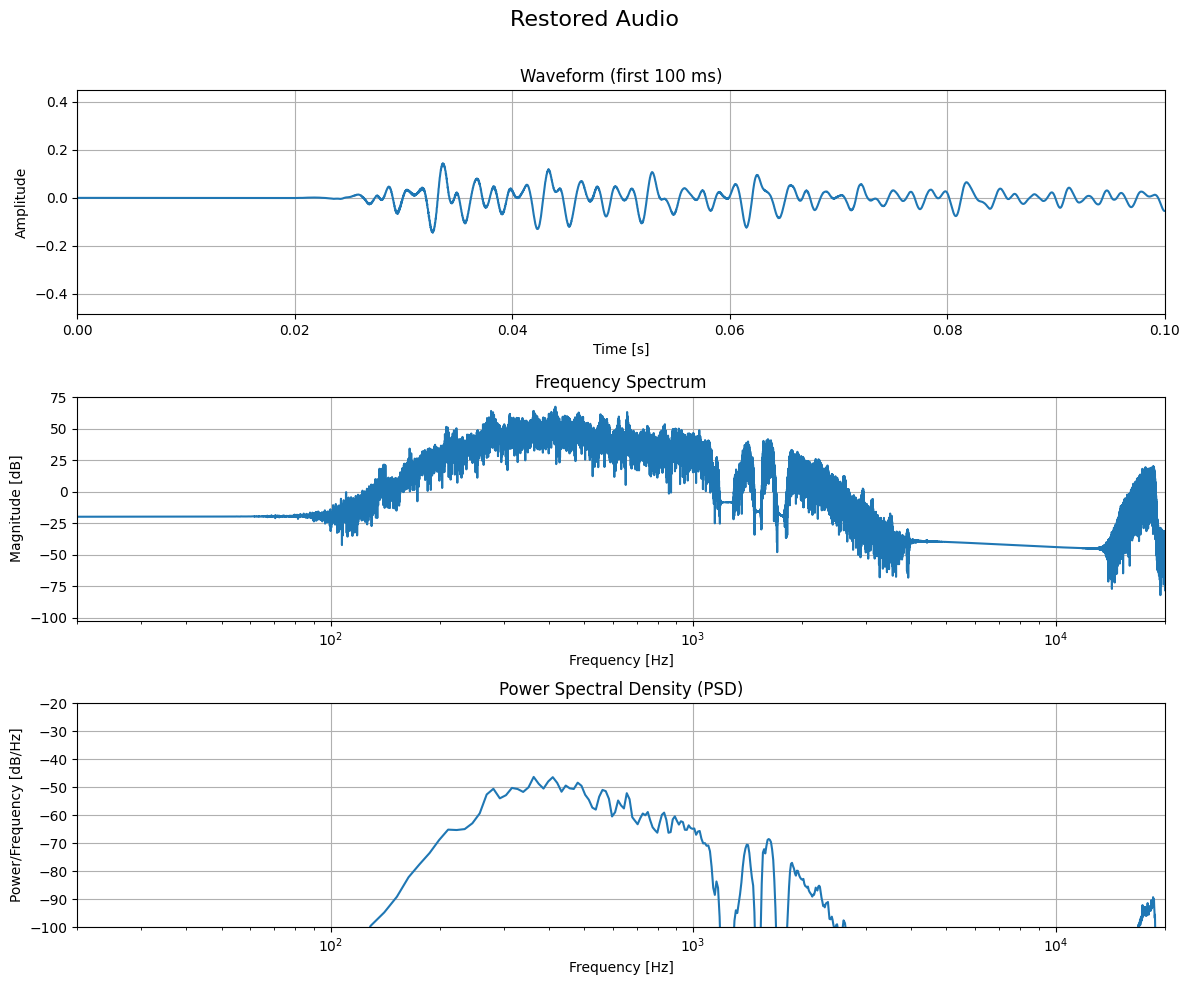

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
import librosa.display

# Load audio file
y, sr = librosa.load('/content/drive/My Drive/EE200/Question2/song_with_2piccolo.wav',
                     sr=None, mono=True, dtype=np.float64)

# =================================================================
#                   FILTER DESIGN (Same as provided)
# =================================================================
# Higher frequency filters
bs1a_low, bs1a_high = 1700.0, 17200.0
b_bs1a, a_bs1a = signal.butter(4, [bs1a_low, bs1a_high], btype='bandstop', fs=sr)

bs2a_low, bs2a_high = 4000.0, 16000.0
b_bs2a, a_bs2a = signal.butter(4, [bs2a_low, bs2a_high], btype='bandstop', fs=sr)

# Lower frequency filters
b_hp, a_hp = signal.butter(5, 250.0, btype='highpass', fs=sr)  # HPF

bs1_low, bs1_high = 1100.0, 1400.0
b_bs1, a_bs1 = signal.butter(4, [bs1_low, bs1_high], btype='bandstop', fs=sr)

bs2_low, bs2_high = 1650.0, 1850.0
b_bs2, a_bs2 = signal.butter(4, [bs2_low, bs2_high], btype='bandstop', fs=sr)

bs3_low, bs3_high = 1420.0, 1600.0
b_bs3, a_bs3 = signal.butter(4, [bs3_low, bs3_high], btype='bandstop', fs=sr)

# =================================================================
#                   ANALYSIS VISUALIZATIONS
# =================================================================
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True

# ---------------------------------------------------------------
# 1. BODE PLOTS for each filter
# ---------------------------------------------------------------
filters = [
    (b_hp, a_hp, 'High-Pass (250 Hz)', 'blue'),
    (b_bs1, a_bs1, f'Band-Stop ({bs1_low}-{bs1_high} Hz)', 'green'),
    (b_bs2, a_bs2, f'Band-Stop ({bs2_low}-{bs2_high} Hz)', 'red'),
    (b_bs3, a_bs3, f'Band-Stop ({bs3_low}-{bs3_high} Hz)', 'purple'),
    (b_bs1a, a_bs1a, f'Wide Band-Stop ({bs1a_low}-{bs1a_high} Hz)', 'orange'),
    (b_bs2a, a_bs2a, f'Wide Band-Stop ({bs2a_low}-{bs2a_high} Hz)', 'brown')
]

fig_bode, axs = plt.subplots(2, 3, figsize=(18, 12))
fig_bode.suptitle('Bode Plots of Filter Stages', fontsize=16)

for idx, (b, a, title, color) in enumerate(filters):
    w, h = signal.freqz(b, a, worN=8000, fs=sr)
    mag = 20 * np.log10(np.abs(h))
    phase = np.unwrap(np.angle(h)) * 180 / np.pi

    ax = axs[idx//3, idx%3]
    ax.set_title(title)
    ax.semilogx(w, mag, color=color, linewidth=2)
    ax.set_ylabel('Magnitude (dB)')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylim(-60, 5)
    ax.set_xlim(20, 20000)

    ax2 = ax.twinx()
    ax2.semilogx(w, phase, 'k--', alpha=0.5)
    ax2.set_ylabel('Phase (degrees)')
    ax2.set_ylim(-360, 0)

plt.tight_layout()
plt.savefig('bode_plots.png', dpi=300)

# ---------------------------------------------------------------
# 2. POLE-ZERO PLOTS
# ---------------------------------------------------------------
fig_pz, axs = plt.subplots(2, 3, figsize=(18, 12))
fig_pz.suptitle('Pole-Zero Plots of Filter Stages', fontsize=16)

for idx, (b, a, title, _) in enumerate(filters):
    ax = axs[idx//3, idx%3]
    ax.set_title(title)

    # Plot poles and zeros
    zeros = np.roots(b)
    poles = np.roots(a)
    ax.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none',
               edgecolors='r', s=100, label='Zeros')
    ax.scatter(np.real(poles), np.imag(poles), marker='x', color='b',
               s=100, label='Poles')

    # Unit circle for stability reference
    circle = plt.Circle((0,0), 1, fill=False, color='k', linestyle='--', alpha=0.3)
    ax.add_patch(circle)

    ax.axvline(0, color='0.7', linestyle=':')
    ax.axhline(0, color='0.7', linestyle=':')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.savefig('pole_zero_plots.png', dpi=300)

# ---------------------------------------------------------------
# 3. POWER SPECTRAL DENSITY (PSD) COMPARISON
# ---------------------------------------------------------------
# Compute PSD for original and filtered signals
freqs, Pxx_orig = signal.welch(y, fs=sr, nperseg=4096)
_, Pxx_bs1a = signal.welch(signal.filtfilt(b_bs1a, a_bs1a, y), fs=sr, nperseg=4096)
_, Pxx_bs2a = signal.welch(signal.filtfilt(b_bs2a, a_bs2a, y), fs=sr, nperseg=4096)
_, Pxx_hp = signal.welch(signal.filtfilt(b_hp, a_hp, y), fs=sr, nperseg=4096)
_, Pxx_final = signal.welch(
    signal.filtfilt(b_bs3, a_bs3,
    signal.filtfilt(b_bs2, a_bs2,
    signal.filtfilt(b_bs1, a_bs1, y))),
    fs=sr, nperseg=4096
)

# Plot PSD comparison
plt.figure(figsize=(14, 8))
plt.semilogx(freqs, 10*np.log10(Pxx_orig), 'k-', alpha=0.8, label='Original')
plt.semilogx(freqs, 10*np.log10(Pxx_bs1a), 'orange', alpha=0.7, label='After Wide BS1')
plt.semilogx(freqs, 10*np.log10(Pxx_bs2a), 'brown', alpha=0.7, label='After Wide BS2')
plt.semilogx(freqs, 10*np.log10(Pxx_hp), 'blue', alpha=0.8, label='After HPF')
plt.semilogx(freqs, 10*np.log10(Pxx_final), 'r-', linewidth=2, label='Final Filtered')

# Highlight target removal regions
plt.axvspan(1100, 1400, color='red', alpha=0.15, label='Piccolo Fundamentals')
plt.axvspan(1650, 1850, color='purple', alpha=0.15, label='Piccolo Harmonics')
plt.axvspan(20, 250, color='blue', alpha=0.1, label='Low-Freq Beats')

plt.title('Power Spectral Density (PSD) Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.xlim(20, 20000)
plt.ylim(-100, -20)
plt.legend(loc='upper right')
plt.grid(True, which="both", ls="-")
plt.savefig('psd_comparison.png', dpi=300)

# ---------------------------------------------------------------
# 4. SPECTROGRAM COMPARISON (Original vs Filtered)
# ---------------------------------------------------------------
# Apply full filter cascade
y_temp = signal.filtfilt(b_bs1a, a_bs1a, y)
y_temp = signal.filtfilt(b_bs2a, a_bs2a, y_temp)
y_temp = signal.filtfilt(b_hp, a_hp, y_temp)
y_temp = signal.filtfilt(b_bs1, a_bs1, y_temp)
y_temp = signal.filtfilt(b_bs2, a_bs2, y_temp)
y_restored = signal.filtfilt(b_bs3, a_bs3, y_temp)

# Generate spectrograms
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(S_orig, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')
plt.ylim([20, 10000])

plt.subplot(2, 1, 2)
S_restored = librosa.amplitude_to_db(np.abs(librosa.stft(y_restored)), ref=np.max)
librosa.display.specshow(S_restored, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Audio Spectrogram')
plt.ylim([20, 10000])

plt.tight_layout()
plt.savefig('spectrogram_comparison.png', dpi=300)

plt.show()
# --- 5. Signal Analysis: Original vs Restored ---
print("\n--- SIGNAL ANALYSIS ---")

def plot_signal_analysis(audio_data, sr, title):
    """Plot waveform, frequency spectrum, and PSD for audio signal"""
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)

    # Waveform (first 0.1 seconds)
    time = np.arange(len(audio_data)) / sr
    ax1.plot(time, audio_data)
    ax1.set_xlim(0, 0.1)  # first 100 ms
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Waveform (first 100 ms)')

    # Frequency Spectrum (FFT)
    n = len(audio_data)
    fft = np.fft.rfft(audio_data)
    mag = np.abs(fft)
    freq = np.fft.rfftfreq(n, d=1/sr)
    ax2.semilogx(freq, 20 * np.log10(mag + 1e-10))  # Avoid log(0)
    ax2.set_xlim(20, 20000)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Magnitude [dB]')
    ax2.set_title('Frequency Spectrum')

    # Power Spectral Density (PSD)
    freqs, Pxx = signal.welch(audio_data, sr, nperseg=4096)
    ax3.semilogx(freqs, 10 * np.log10(Pxx))
    ax3.set_xlim(20, 20000)
    ax3.set_ylim(-100, -20)
    ax3.set_xlabel('Frequency [Hz]')
    ax3.set_ylabel('Power/Frequency [dB/Hz]')
    ax3.set_title('Power Spectral Density (PSD)')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Plot analysis for both signals
plot_signal_analysis(y, sr, "Original Audio")
plot_signal_analysis(y_restored, sr, "Restored Audio")